<a href="https://colab.research.google.com/github/mjgpinheiro/Physics_models/blob/main/dissipative_engineered_dynamics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams.update({
    "font.size": 11,
    "figure.figsize": (5,3.5)
})


In [2]:
def dissipative_map(a, phi):
    return 0.5 * (1 + (2*a - 1)*np.cos(phi))


In [3]:
def iterate_map(a0, phi, steps=20):
    a = [a0]
    for _ in range(steps):
        a.append(dissipative_map(a[-1], phi))
    return np.array(a)


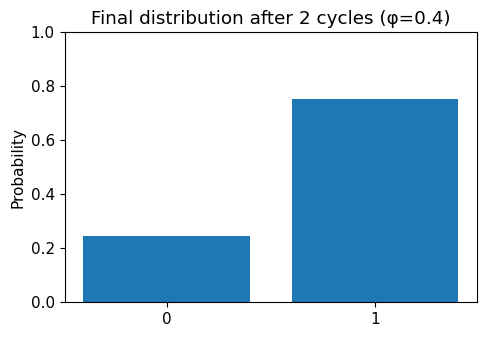

In [4]:
phi = 0.4
a0 = 0.2  # estado inicial arbitrário

a_vals = iterate_map(a0, phi, steps=2)
final_prob = a_vals[-1]

states = ['0','1']
probs  = [final_prob, 1-final_prob]

plt.bar(states, probs)
plt.ylim(0,1)
plt.ylabel("Probability")
plt.title(f"Final distribution after 2 cycles (φ={phi})")
plt.tight_layout()
plt.savefig("fig1_probabilities.pdf")
plt.show()


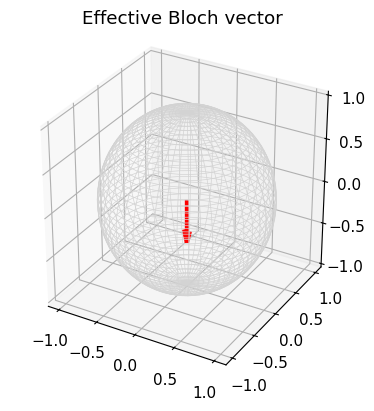

In [5]:
rz = 2*final_prob - 1  # <sigma_z>

fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot(111, projection='3d')

# Sphere
u = np.linspace(0, 2*np.pi, 50)
v = np.linspace(0, np.pi, 50)
x = np.outer(np.cos(u), np.sin(v))
y = np.outer(np.sin(u), np.sin(v))
z = np.outer(np.ones_like(u), np.cos(v))
ax.plot_wireframe(x, y, z, color='lightgray', linewidth=0.5)

ax.quiver(0,0,0, 0,0,rz, color='red', linewidth=3)

ax.set_title("Effective Bloch vector")
ax.set_box_aspect([1,1,1])
plt.tight_layout()
plt.savefig("fig2_bloch_vector.pdf")
plt.show()


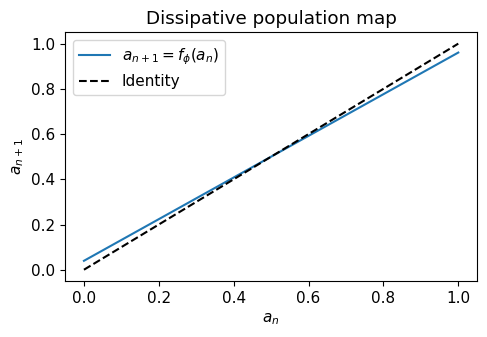

In [6]:
a = np.linspace(0,1,400)
phi = 0.4

plt.plot(a, dissipative_map(a,phi), label=r"$a_{n+1}=f_\phi(a_n)$")
plt.plot(a, a, 'k--', label="Identity")

plt.xlabel(r"$a_n$")
plt.ylabel(r"$a_{n+1}$")
plt.legend()
plt.title("Dissipative population map")
plt.tight_layout()
plt.savefig("fig3_dissipative_map.pdf")
plt.show()


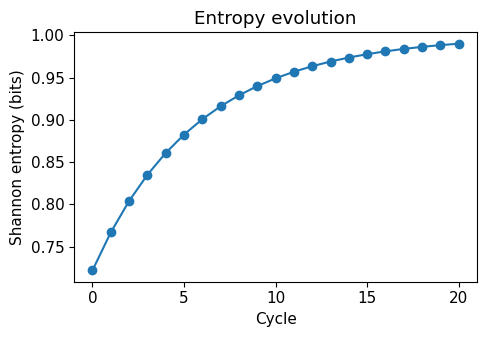

In [7]:
def entropy(a):
    if a == 0 or a == 1:
        return 0
    return -a*np.log2(a) - (1-a)*np.log2(1-a)

phi = 0.4
a_vals = iterate_map(0.2, phi, steps=20)
entropy_vals = [entropy(a) for a in a_vals]

plt.plot(entropy_vals, marker='o')
plt.xlabel("Cycle")
plt.ylabel("Shannon entropy (bits)")
plt.title("Entropy evolution")
plt.tight_layout()
plt.savefig("fig4_entropy_cycles.pdf")
plt.show()
